# Corsair Assessment Part 2 
<p>This is an anlaysis of Mock Corsair Data. I will be using Python and Juypter Notebooks to showcase my findings.
<br>
Noteable Expored Concepts:
<br>
1. Return Correlation
<br>
2. Regional Sales
<br>
3. Data I would want to collect
</p>


In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

pd.options.mode.chained_assignment = None

In [44]:
#read xlsx file
df = pd.read_csv("CorsairData - BI_Dashboard.csv")

In [45]:
#check if working
df.head()

,SalesOrderNumber,FiscalYear,FiscalQuarter,SalesTerritoryRegion,ProductCategoryName,ProductSubcategoryName,ProductGroupName,OrderStatus,OrderQuantity,UnitPrice,Profit,SalesAmount,Return
0,SO44243,2012,1,China,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
1,SO43808,2012,1,Germany,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
2,SO44204,2012,1,Southwest,PC Components,CPU Coolers,Air Coolers,Shipped,1,99.99,$21.41,$99.99,False
3,SO44173,2012,1,United Kingdom,PC Components,CPU Coolers,Air Coolers,Shipped,1,99.99,$21.41,$99.99,False
4,SO43750,2012,1,Australia,Gaming Gear,Apparel,Apparel,Shipped,1,24.99,$8.39,$24.99,False


In [57]:
#unique countries
df.SalesTerritoryRegion.value_counts()

China             1899
Southwest          969
Northwest          653
United Kingdom     570
Germany            501
Australia          494
Canada             337
Southeast            3
Central              1
Northeast            1
Name: SalesTerritoryRegion, dtype: int64

In [46]:
#check datatypes
df.dtypes

SalesOrderNumber           object
FiscalYear                  int64
FiscalQuarter               int64
SalesTerritoryRegion       object
ProductCategoryName        object
ProductSubcategoryName     object
ProductGroupName           object
OrderStatus                object
OrderQuantity               int64
UnitPrice                 float64
Profit                     object
SalesAmount                object
Return                       bool
dtype: object

In [54]:
#number of orginal entries
df.shape[0]

5428

## Return Correlations
#### Here are some general findings 
<p>
There are 57 entries from the original file, where [Return] value is True.
<br>
A majority of the returns come from China, Southwest, Germany, Canada. This is potentially a false positive result. If we assume that returns are inevitable, we will inevitably have the most returns from the countries that tend to purchase most of the items.
Countries without returns include; Southeast, Central, Northeast(however fewest orders 3, 1, 1 respectively). 
<br>
Most Returned items are Gaming Gear or PC Components. This aspect is probably the most concerning. These two categories combined make up 80% of the returned items. This would probably require further exploration in terms of quality of item, customer review, or other factors that would clarify this concerning rate.
<br>
None of the orders were backordered. This is reassuring, as there should not be returned items, for items that have yet to arrive towards for the buyer.
<br>
ProductSubcategory, ProductGroup, OrderQuantity, UnitPrice/SalesAmount are most liekely unaffecting towards return rate. The respective values were too diverse amongst one another to cause an immediate concern. 
</p>

In [47]:
#get dataframe based on rows where return is True
was_returned = df.loc[df['Return'] == True]

In [48]:
#check if succeded, then check size
was_returned.head()


,SalesOrderNumber,FiscalYear,FiscalQuarter,SalesTerritoryRegion,ProductCategoryName,ProductSubcategoryName,ProductGroupName,OrderStatus,OrderQuantity,UnitPrice,Profit,SalesAmount,Return
23,SO44147,2012,1,China,Streaming Gear,Audio,Audio,Shipped,1,29.99,$4.37,$29.99,True
68,SO44048,2012,1,China,Gaming PC,Gaming PC,Corsair One Gaming PC,Shipped,1,3499.99,"$2,766.99","$3,499.99",True
76,SO43710,2012,1,China,PC Components,CPU Coolers,Dual Radiator Liquid Coolers,Shipped,1,169.99,$96.19,$169.99,True
109,SO43776,2012,1,Germany,PC Components,Fans,GRB Fans,Shipped,1,129.99,$76.34,$129.99,True
177,SO44068,2012,1,Germany,PC Components,Cases,Mid Tower Atx Cases,Shipped,1,149.99,$39.54,$149.99,True


In [49]:
#check amount of returned
was_returned.shape[0]

57

In [50]:
#find which countries have returned orders, and count
was_returned.SalesTerritoryRegion.value_counts()

China             20
Southwest         12
Germany            9
Canada             7
Northwest          4
Australia          3
United Kingdom     2
Name: SalesTerritoryRegion, dtype: int64

In [51]:
#find which product_categoryname have returned orders, and count
was_returned.ProductCategoryName.value_counts()

Gaming Gear       27
PC Components     23
Gaming PC          5
Streaming Gear     2
Name: ProductCategoryName, dtype: int64

In [52]:
#find which product_groupname have returned orders, and count
was_returned.ProductGroupName.value_counts()

Corsair One Gaming PC                              4
Fittings and Tubing                                3
Cloth Surface Mouse Pads                           3
PC Components Replacement Parts                    3
USB Drives                                         2
Laptop and Notebook Memory                         2
FPS Action Gaming Mice                             2
Apparel                                            2
RGB Mechanical Gaming Keyboards                    2
Performance Memory                                 2
Gaming Chairs                                      2
Software Control and Monitoring Cases              2
Wireless Gaming Headsets                           2
Wireless Gaming Mice                               2
Stereo 3.5MM Gaming Headsets                       2
GRB Fans                                           2
Room Lighting                                      1
Vengeance Gaming PC                                1
Triple Radiator Liquid Coolers                

In [18]:
#find which product_groupname have returned orders, and count
was_returned.ProductSubcategoryName.value_counts()

Mice                  6
Gaming PC             5
Custom Cooling        5
Headsets              4
Memory                4
Cases                 4
Mousepads             4
Storage               4
Apparel               3
Accessories           3
Keyboards             3
Chairs                2
Fans                  2
CPU Coolers           2
Ambient Lighting      2
Capture               1
Power Supply Units    1
Thunderbolt Docks     1
Audio                 1
Name: ProductSubcategoryName, dtype: int64

In [19]:
#find which product_groupname have returned orders, and count
was_returned.FiscalYear.value_counts()

2013    39
2012    18
Name: FiscalYear, dtype: int64

In [20]:
#find which product_groupname have returned orders, and count
was_returned.FiscalQuarter.value_counts()

1    28
2    12
4     9
3     8
Name: FiscalQuarter, dtype: int64

In [22]:
#find which product_groupname have returned orders, and count
was_returned.OrderStatus.value_counts()

Shipped    57
Name: OrderStatus, dtype: int64

In [53]:
#find which product_groupname have returned orders, and count
was_returned.SalesAmount.value_counts()

$69.99        4
$79.99        4
$59.99        3
$3,499.99     3
$99.99        3
$184.99       2
$159.99       2
$179.99       2
$214.99       2
$399.99       2
$299.99       2
$26.99        2
$49.99        2
$39.99        2
$119.99       2
$24.99        2
$129.99       2
$249.99       1
$2,799.99     1
$20.99        1
$22.99        1
$259.99       1
$29.99        1
$74.99        1
$16.99        1
$19.99        1
$32.00        1
$199.99       1
$89.99        1
$2,899.99     1
$149.99       1
$169.99       1
$154.99       1
Name: SalesAmount, dtype: int64

## Start of Analysis for Regional Sales
<p>
Year over year, we see that the lowest performing quarter in 2012 is almost never crossed the following year of 2013. Meaning, the lowest perfroming quarter(per country) could be used as a sales target for each quarter of the following year. This would probably be only accurate for countries that have stronger back to back quarters. Take Canada for example, it would not be suprising if Canada were to have a 2014 quarter that underperforms all of 2013 earnings, as it tends to have more than 2 consecutives quarters where the total sales underperforms its previous quarter.
<br> 
We also see that the three new regions appeared towards the tail end of the 2013 year. While they might pose as potential markets, the sample size seems too little to make any reasonable assumptions.
<br>
The China, Northwest and Southwest are by far the most succesful countries in terms of growth in sales. All three regions had 4th quarter total sales that were greater than their 3rd quarter sales, for both the 2012 and 2013 years. Coincidentally their 1st to 2nd quarters seem to mimic this growth in each respective year. Despite a small sample size, focusing on these three regions on sales would probably be more profitable compared to other regions.
</p>

In [58]:
# compare regional sales, probably by year
df_2012 = df.loc[df['FiscalYear'] == 2012]
df_2013 = df.loc[df['FiscalYear'] == 2013]

In [59]:
df_2012.head()

,SalesOrderNumber,FiscalYear,FiscalQuarter,SalesTerritoryRegion,ProductCategoryName,ProductSubcategoryName,ProductGroupName,OrderStatus,OrderQuantity,UnitPrice,Profit,SalesAmount,Return
0,SO44243,2012,1,China,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
1,SO43808,2012,1,Germany,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
2,SO44204,2012,1,Southwest,PC Components,CPU Coolers,Air Coolers,Shipped,1,99.99,$21.41,$99.99,False
3,SO44173,2012,1,United Kingdom,PC Components,CPU Coolers,Air Coolers,Shipped,1,99.99,$21.41,$99.99,False
4,SO43750,2012,1,Australia,Gaming Gear,Apparel,Apparel,Shipped,1,24.99,$8.39,$24.99,False


In [60]:
df_2013.head()

,SalesOrderNumber,FiscalYear,FiscalQuarter,SalesTerritoryRegion,ProductCategoryName,ProductSubcategoryName,ProductGroupName,OrderStatus,OrderQuantity,UnitPrice,Profit,SalesAmount,Return
2206,SO46754,2013,1,China,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
2207,SO47212,2013,1,China,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
2208,SO47286,2013,1,Germany,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
2209,SO46883,2013,1,Southwest,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False
2210,SO47119,2013,1,United Kingdom,Gaming Gear,Apparel,Accessories,Shipped,1,20.99,$17.98,$20.99,False


In [64]:
#plot based on sum of data by quarter 2012
df_2012_grp = df_2012.groupby(['FiscalQuarter', 'SalesTerritoryRegion'])['UnitPrice'].sum().reset_index()
df_2012_grp


,FiscalQuarter,SalesTerritoryRegion,UnitPrice
0,1,Australia,8105.70
1,1,Canada,2345.70
2,1,China,45280.20
3,1,Germany,6969.70
4,1,Northwest,7776.55
5,1,Southwest,13018.14
6,1,United Kingdom,16967.42
7,2,Australia,8220.71
8,2,Canada,2011.74
9,2,China,58391.90


In [78]:
#adjust graph size
sns.set(rc={'figure.figsize': (15, 8)})

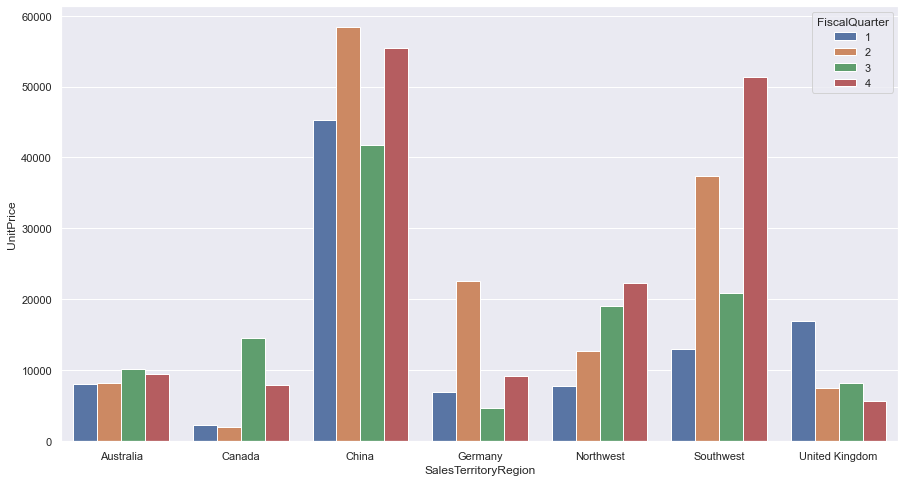

In [89]:
#seaborn barplot visualization
ax2012 = sns.barplot(x='SalesTerritoryRegion', y='UnitPrice',hue='FiscalQuarter', data=df_2012_grp)

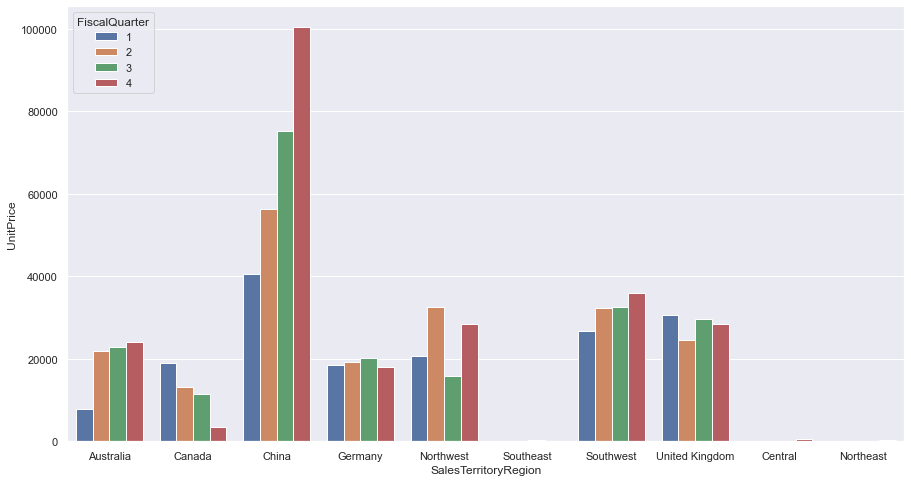

In [83]:
#do same steps for 2013
df_2013_grp = df_2013.groupby(['FiscalQuarter', 'SalesTerritoryRegion'])['UnitPrice'].sum().reset_index()
ax2013 = sns.barplot(x='SalesTerritoryRegion', y='UnitPrice',hue='FiscalQuarter', data=df_2013_grp)

## What Data I would like to Explore
<p>
Example 1: <br>
Given {Ad Placement Region, Ad Cost, Ad Click Rate}, <br>
Use {Permutation Test}, <br>
To {Predict Click to Conversion Rate of Customer}
</p>

<p>
Example 2: <br>
Given {Purchase Date, Delivered Date, Customer Rating}, <br>
Use {Customer Rating / (Delivered Date - Purchase Date)}, <br>
To {Quantify a numerical value in relation to cusstomer rating and delivery speed}
</p>